# Maximum Likelihood Estimation for a distribution (MLE) 

For the explanation purpose I will an exponential distribution, which is commonly used to model the time until an event occurs (interval time between events). 

Likelihood of a distribution with a specific model parameterization ($\lambda$) given observed data ($x$): 

$L(\lambda|x)= \lambda e^{- \lambda x}$ ,

**Estimation comes to finding the value of the lambda coefficient to maximize the fit of the function to the data!**

In [20]:
# Libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from utils import SQL

In [21]:
# Import data
sql = SQL(database="../database.db")
sql.tabales

['Customers', 'CCD', 'Full-factorial']

In [22]:
df = sql.data_frame("Customers")
df.head()

,Intervals
0,0.011590
1,0.056453
2,0.014528
3,0.014711
4,0.029060


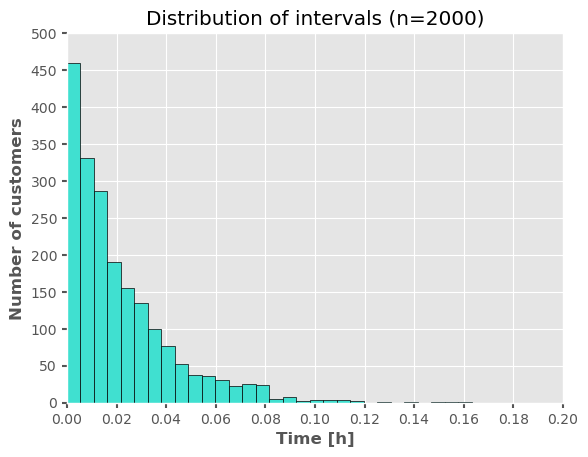

In [23]:
# Histogram
plt.style.use("ggplot")
plt.hist(df, bins=30, color="turquoise", edgecolor="black", linewidth=0.5)
plt.xlim(0, 0.2)    
plt.xticks(np.arange(0, 0.21, 0.02))
plt.yticks(np.arange(0, 550, 50))
plt.tick_params(width=1.5)
plt.title(f"Distribution of intervals (n={df.shape[0]})")
plt.ylabel("Number of customers", fontdict={"fontweight":"bold"})
plt.xlabel("Time [h]", fontdict={"fontweight":"bold"})
plt.show()

# Likelihood and Log-Likelihood functions

**For all given data $\{x_1, x_2, x_3, \ldots, x_n \}$**

- Likelihood $L(\lambda \mid x)$ is desribed by the following equation:

$L(\lambda \mid x_1, x_2, x_3, \ldots, x_n) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}$

- Log-Likelihood $log(L(\lambda \mid x_1, x_2, x_3, \ldots, x_n))$ is desribed by the following equation:

$\log(L(\lambda \mid x_1, x_2, x_3, \ldots, x_n)) = \sum_{i=1}^{n} \log (\lambda e^{-\lambda x_i})$

- It's often more convenient to work with the log-likelihood function, especially for computional purposes. 

#### **Calculations**:

$\log(L(\lambda \mid x_1, x_2, x_3, \ldots, x_n)) = \sum_{i=1}^{n} \log (\lambda e^{-\lambda x_i})$

$=\sum_{i=1}^{n} \log (\lambda) + \log (e^{-\lambda x_i})$


$=n\log (\lambda) + \sum_{i=1}^{n} \log (e^{-\lambda x_i})$

$=n\log (\lambda) + \sum_{i=1}^{n} -\lambda x_i$

$=n\log (\lambda) -\lambda \sum_{i=1}^{n} x_i$

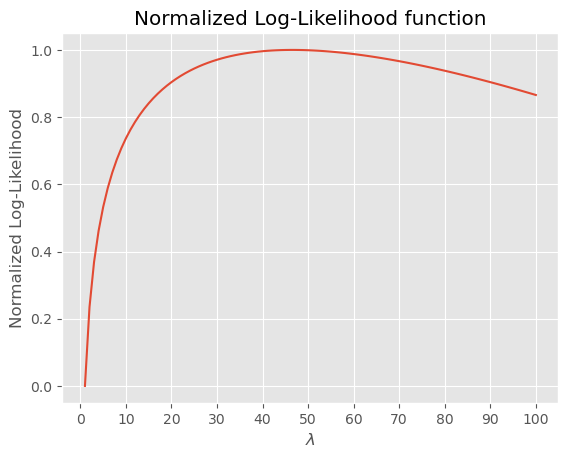

In [24]:
data = df["Intervals"]

def log_likelihood(lmb: float, data: list[float]) -> float:
    data = np.array(data)
    n = len(data)
    return n * np.log(lmb) - lmb * np.sum(data)

lambda_domain = list(np.linspace(1, 100, 100).round(2))
likelihood = [log_likelihood(lmb=i, data=data) for i in lambda_domain]
likelihood_normalized = [((i - np.min(likelihood)) / (np.max(likelihood) - np.min(likelihood))) for i in likelihood]

plt.plot(lambda_domain, likelihood_normalized)
plt.xlabel(r"$\lambda$",fontdict={"fontweight":"bold"})
plt.ylabel("Normalized Log-Likelihood")
plt.xticks(np.arange(0, 110, 10))
plt.title("Normalized Log-Likelihood function")
plt.show()

# Maximization

$\lambda_{max} = \underset{\lambda}{\operatorname{argmax}} \log L(\lambda \mid x_1, x_2 \dots x_n)$

To find $\lambda_{max}$ we need to find the value of lambda that maximizes the log likelihood function:

---

$\frac{d}{d\lambda}\log L(\lambda \mid x_1, x_2 \dots x_n) = \frac{d}{d\lambda}(n\log(\lambda) - \lambda \sum_{i=1}^{n}x_i)$

$=\frac{d}{d\lambda}(n \log \lambda) - \frac{d}{d\lambda}(\lambda \sum_{i=1}^{n}x_i)$

$=n \frac{d}{d\lambda}\log \lambda - (\sum_{i=1}^{n}x_i) \frac{d}{d\lambda}\lambda$

$=n \frac{1}{\lambda} - \sum_{i=1}^{n}x_i$

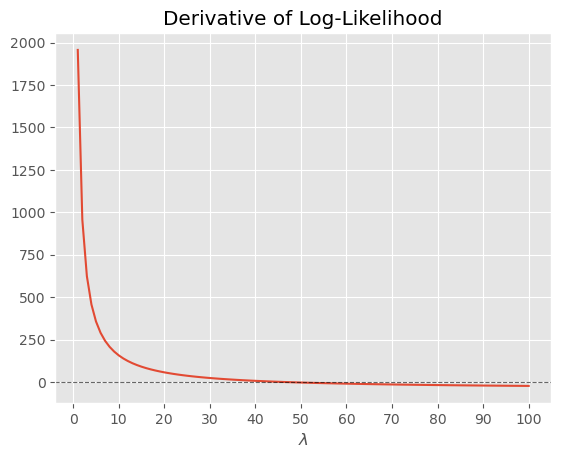

In [25]:
def dydx_log_likelihood(lmb: float, data: list[float]) -> float:
    data = np.array(data)
    n = len(data)
    return n/lmb - np.sum(data)

lambda_domain = list(np.linspace(1, 100, 100).round(2))
dydx_likelihood = [dydx_log_likelihood(lmb=i, data=data) for i in lambda_domain]

plt.plot(lambda_domain, dydx_likelihood)
plt.xlabel(r"$\lambda$")
plt.xticks(np.arange(0, 110, 10))
plt.axhline(0, linestyle="--", linewidth=0.8, alpha=0.6, color="black")
plt.title("Derivative of Log-Likelihood")
plt.show()

# Parameter estimate

We can find critical point for the derivative of the log likelihood function with respect to lambda and set it equal to zero to solve for lambda:

$\frac{n}{\lambda_{max}} - \sum_{i=1}^{n}x_i = 0$

$\frac{n}{\lambda_{max}} = \sum_{i=1}^{n}x_i$

$\frac{\lambda_{max}}{n} = \frac{1}{\sum_{i=1}^{n}x_i}$

$\lambda_{max} = \frac{n}{\sum_{i=1}^{n}x_i}$

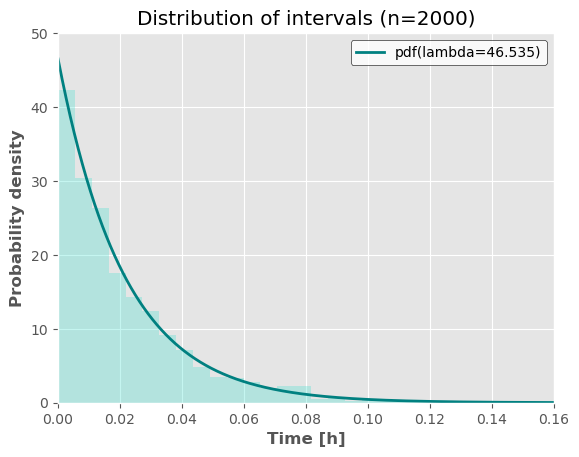

In [26]:
def mle_lambda(data: list[float]) -> float:
    data = np.array(data)
    n = len(data)
    return n / np.sum(data)

coeff = mle_lambda(data=data)

def exponential_pdf(lmb: float, x: float) -> float:
    return lmb * np.e ** (- lmb * x)

x = np.linspace(np.min(data), np.max(data), len(data))

# Histogram
plt.hist(data, bins=30, density=True, alpha=0.3, color="turquoise")
plt.plot(x, exponential_pdf(lmb=coeff, x=x), label=f"pdf(lambda={coeff:.3f})", color="teal", linewidth=2)
plt.xticks(np.arange(0, 0.18, 0.02))
plt.yticks(np.arange(0, 60, 10))
plt.xlim(0, 0.16)
plt.title(f"Distribution of intervals (n={df.shape[0]})")
plt.xlabel("Time [h]", fontdict={"fontweight":"bold"})
plt.ylabel("Probability density", fontdict={"fontweight":"bold"})
plt.legend(facecolor='white', edgecolor='black')
plt.show()

# Expected value

The expected value, also known as the mean or expectation, is a measure of the central tendency of a probability distribution. It represents the average value of a random variable over many trials. The calculation differs slightly between continuous and discrete distributions.

- For a continous distribution: 

$E(X) = \int_{-\infty}^{\infty} x f(x) dx$

- For a discrete distribution: 

$E(X) = \sum_{i=1}^{n} x_i P(X=x)$

- In case of exponential distribution:

$E(X) = \int_{0}^{\infty} x  \lambda e^{- \lambda x} dx$

In [27]:
import sympy as smp

la, x = smp.symbols("lambda, x", real=True, positive=True)
expression = la * smp.E ** (- la * x)
smp.integrate((x * expression), (x, 0, smp.oo))


1/lambda

# Conclusions

In [28]:
ev = 1 / coeff

print(f"A customer enters the shop every {ev:.4f} hour.")
print(f"This translates to {math.floor(ev*60)} minute(s) and {np.round(ev*60%1*60, decimals=0):.0f} second(s) time interval between each entry.")
print(f"On average {np.round(coeff):.0f} customers will visit the shop every hour.")

A customer enters the shop every 0.0215 hour.
This translates to 1 minute(s) and 17 second(s) time interval between each entry.
On average 47 customers will visit the shop every hour.


Interestingly, we can conclude:

$\overline{x} = \frac{1}{\lambda} = \frac{\sum_{i=1}^{n}x_i}{n}$

# Poisson distribution

The Poisson distribution $P(X = k)$ is commonly used to model the number of events occurring in a fixed interval of time or space, given a known average rate of occurrence (λ).

$P(X = n) = \frac{e^{-\lambda} \lambda^n}{n!}$

- $P(X=n)$ - the probability of observing k events
- $e$ - Euler's number
- $\lambda$ - is the average rate of occurrence
- $n$ is the number of events observed

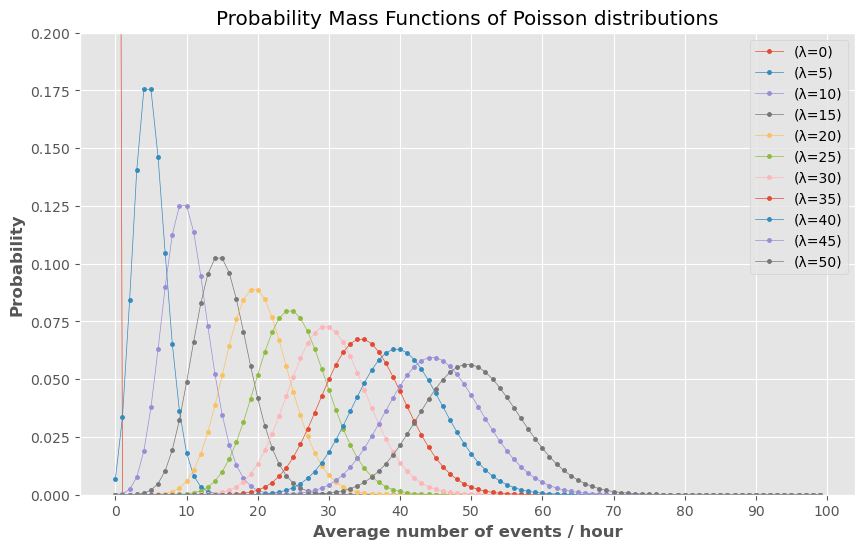

In [33]:
from scipy.stats import poisson

x = np.arange(0, 100, 1)
plt.figure(figsize=(10, 6))
for lambda_value in range(0, 55, 5):
    plt.plot(x, poisson.pmf(x, lambda_value), marker='o', markersize=2.5, linewidth=0.5, linestyle='-', label=f'(λ={lambda_value})')
plt.title("Probability Mass Functions of Poisson distributions")
plt.xlabel('Average number of events / hour', fontdict={"fontweight":"bold"})
plt.ylabel('Probability', fontdict={"fontweight":"bold"})
plt.xticks(np.arange(0, 110, 10))
plt.ylim(0, 0.2)
plt.legend()
plt.show()


Now assuming that frequency of customers visits follow Poisson distribution we can calculate the probability of specific frequency.

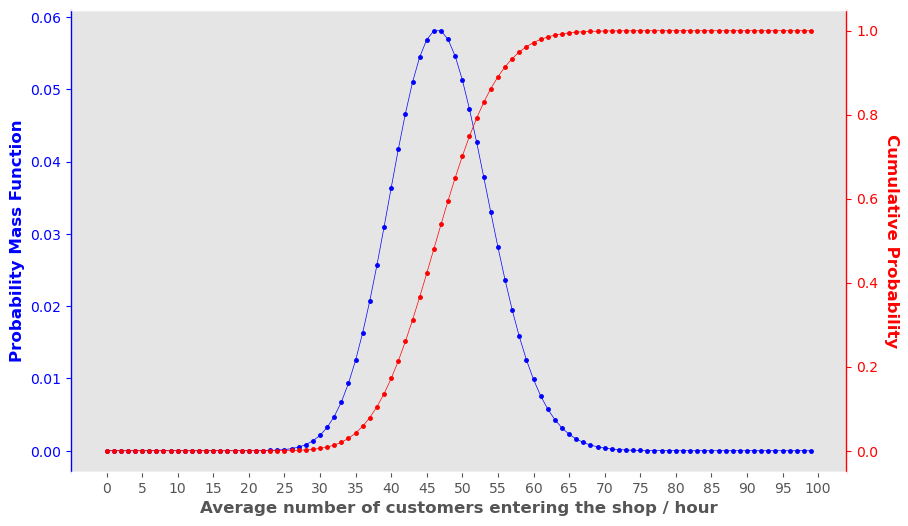

In [32]:
lambda_value = np.round(coeff)
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(False)
ax.plot(x, poisson.pmf(x, lambda_value), marker='o', markersize=2.5, linewidth=0.5, linestyle='-', color="blue")
ax.tick_params(axis='y', colors='blue')
ax.set_xticks(np.arange(0, 110, 5))
ax.set_ylabel('Probability Mass Function', fontdict={"fontweight":"bold"}, color="blue")
ax.set_xlabel('Average number of customers entering the shop / hour', fontdict={"fontweight":"bold"})

ax2 = plt.twinx()
plt.grid(False)
ax2.plot(x, poisson.cdf(x, lambda_value), marker='o', markersize=2.5, linewidth=0.5, linestyle='-', color="red")
ax2.spines["right"].set_color('red')
ax2.spines["left"].set_color('blue')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylabel("Cumulative Probability", fontdict={"fontweight":"bold"}, color="red", rotation=-90, labelpad=15)

plt.show()

In [31]:
customers = 50
print(f"For instance:\n\
Probability of more than {customers} customers entering the shop within an hour equals {(1 - poisson.cdf(customers, lambda_value)) * 100:.2f}%.")

customers = 60
print(f"Probability of more than {customers} customers entering the shop within an hour equals {(1 - poisson.cdf(customers, lambda_value)) * 100:.2f}%.")

For instance:
Probability of more than 50 customers entering the shop within an hour equals 29.86%.
Probability of more than 60 customers entering the shop within an hour equals 2.82%.
